# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset


In [2]:
dataframe = pd.read_csv('../merged_data.csv')

In [3]:
dataframe

,SMILES,ID,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,Exp. dG,Pred. dG
0,CN1C(=[NH+][C@@](c2cccc(c3cccc(Cl)c3)c2)(C2CCC...,CAT-13f,368.89,2.26,2,2,3,60.30,221.78,0,26,-9.09,-10.24
1,CN1C(=[NH+][C@@](c2cccc(c3cccc(Cl)c3)c2)(C2CC2...,CAT-13d,340.83,1.48,2,2,3,60.30,204.89,0,24,-10.47,-10.50
2,COc1ccc(c2cccc([C@@]3(c4ccccc4)[NH+]=C(N)N(C)C...,CAT-4c,372.45,1.47,2,3,4,69.53,224.20,0,28,-7.85,-7.52
3,CC[C@]1(c2cccc(c3cccc(Cl)c3)c2)[NH+]=C(N)N(C)C1=O,CAT-13b,328.82,1.48,2,2,3,60.30,197.66,0,23,-9.12,-8.92
4,CN1C(=[NH+][C@](c2ccccc2)(c2cccc(c3cnccn3)c2)C...,CAT-4l,344.40,0.25,2,4,3,86.08,207.32,0,26,-9.34,-7.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,c1c(c(ccc1F)Oc1c(=O)n(c2c(c1)cnc(n2)NCC(C)(O)C...,p38a_2y,376.36,2.58,2,7,5,89.27,226.59,0,27,-9.78,-10.60
207,C1COCCC1Nc1ncc2cc(c(=O)n(c2n1)C)Cc1c(cccc1)F,p38a_2i,368.41,2.65,1,6,4,69.04,221.79,0,27,-10.05,-10.22
208,c1c(c(ccc1F)Oc1c(=O)n(c2c(c1)cnc(n2)NC1CCOCC1)...,p38a_2o,480.49,2.50,1,9,7,112.41,289.23,0,33,-10.49,-9.46
209,c1c(c(ccc1F)Oc1c(=O)n(c2c(c1)cnc(n2)N[C@@H]1CC...,p38a_2ff,402.40,3.11,2,7,4,89.27,242.26,0,29,-11.44,-10.79


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SMILES              211 non-null    object 
 1   ID                  211 non-null    object 
 2   MolWt               211 non-null    float64
 3   LogP                211 non-null    float64
 4   HBD                 211 non-null    int64  
 5   HBA                 211 non-null    int64  
 6   RotatableBonds      211 non-null    int64  
 7   TPSA                211 non-null    float64
 8   Volume              211 non-null    float64
 9   LipinskiViolations  211 non-null    int64  
 10  NumAtoms            211 non-null    int64  
 11  Exp. dG             211 non-null    float64
 12  Pred. dG            211 non-null    float64
dtypes: float64(6), int64(5), object(2)
memory usage: 21.6+ KB


The dataset has a total of 13 columns consisting of mostly int or float datatypes except for SMILES and ID


# Feature Selection


#### *Feature Selection*
For getting the best results, we need a set of features that contibute to the best possible prediction for the model. Feature Selection is the method to do exactly that; Select the most relevant features in dataset to train the model.
#### *Feature Pruning*
Unlike selection, this method reduces the set of feature by removing or pruning unnecessary/irrelevant features. 

Both of them overlap in practice. If you're selecting some features, obviously the rest will be discarded or not taken into account.

#### Purpose
By selecting relevant features, the interpretability of what the model is learning can be deduced. Also,

## Correlation Matrix


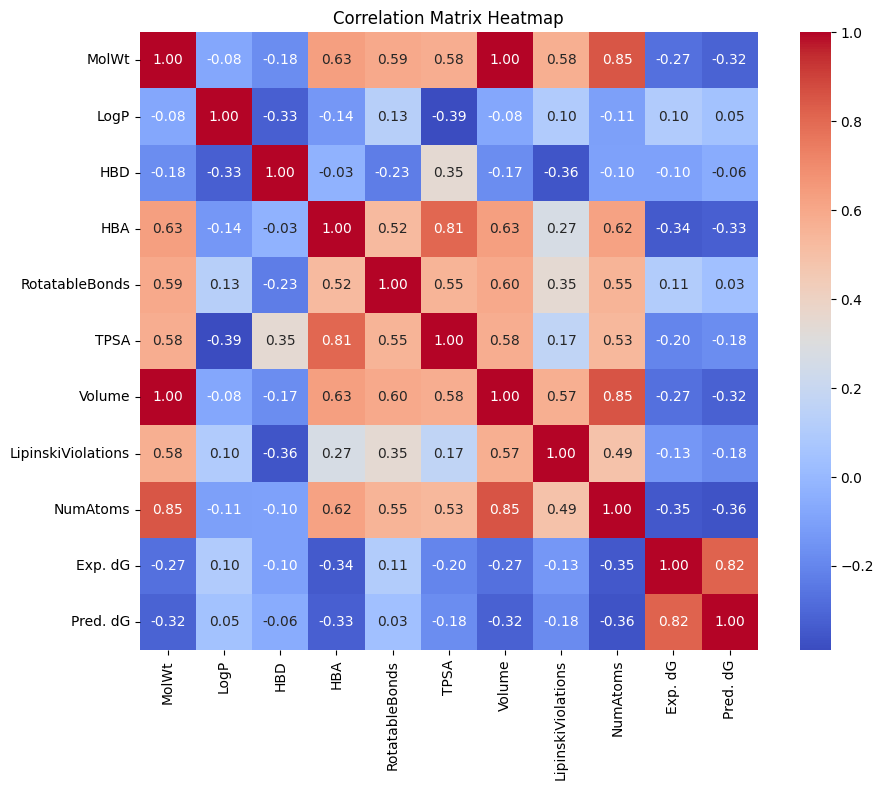

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataframe.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

## Mutual Information


In [6]:
from sklearn.feature_selection import mutual_info_regression

In [22]:
X = dataframe.drop(columns=['Exp. dG', 'Pred. dG']).select_dtypes(include=np.number)
y = dataframe['Exp. dG']

mutual_info_scores = mutual_info_regression(X, y)
mutual_info = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info_scores
})

mutual_info

,Feature,Mutual Information
0,MolWt,0.000000
1,LogP,0.174286
2,HBD,0.076708
3,HBA,0.045934
4,RotatableBonds,0.086229
5,TPSA,0.054892
6,Volume,0.000000
7,LipinskiViolations,0.017324
8,NumAtoms,0.044176


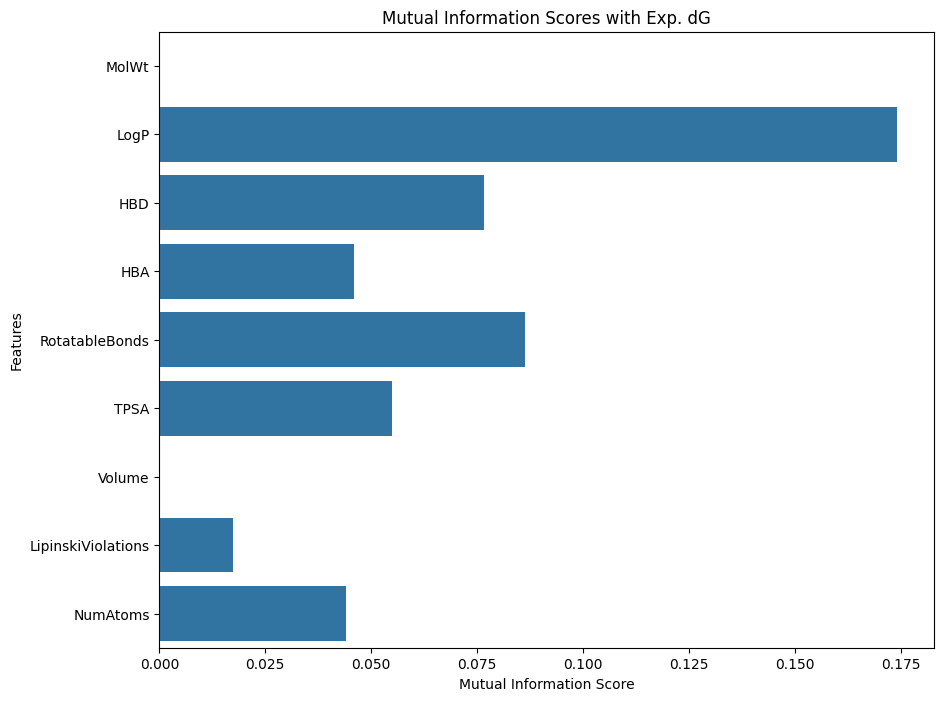

In [24]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Mutual Information', y='Feature', data=mutual_info)
plt.title('Mutual Information Scores with Exp. dG')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.show()